In [1]:
# ÂØºÂÖ•ÂøÖË¶ÅÁöÑÂ∫ì
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import nsdiffs, ndiffs
from pmdarima import auto_arima

In [2]:
file_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\limited.csv"

# ËØªÂèñÊï∞ÊçÆÔºåtimeÂàóËß£Êûê‰∏∫Êó•Êúü‰ΩÜ‰∏çËÆæ‰∏∫Á¥¢Âºï
df = pd.read_csv(file_path, parse_dates=['time'])

# ÊåâÊó∂Èó¥Âàó‰ªéÂ∞èÂà∞Â§ßÊéíÂ∫è
df = df.sort_values('time').reset_index(drop=True)

print(df.head(3))
print(df.tail(3))
print(df.dtypes)
print(f"\nÊï∞ÊçÆÂΩ¢Áä∂Ôºö{df.shape}")
print(f"Êó∂Èó¥ËåÉÂõ¥Ôºö{df['time'].min()} Âà∞ {df['time'].max()}")

        time  GDP_4cum  city_mean_light  region_mean_light title website  \
0 2008-01-01   1634.65        12.553247           0.953015  (Â°´Ë°•)    none   
1 2008-04-01   3346.63        13.280818           0.986813  (Â°´Ë°•)    none   
2 2008-07-01   5351.74        13.191190           0.972665  (Â°´Ë°•)    none   

   Year  Month      GDP    ln_gdp   ln_city  ln_region  city_prop  \
0  2008      1  1634.65  7.399184  2.529979  -0.048125     0.2381   
1  2008      4  1711.98  7.445406  2.586321  -0.013275     0.2519   
2  2008      7  2005.11  7.603454  2.579549  -0.027716     0.2502   

   region_prop  city_yearly_sum  region_yearly_sum  
0       0.2425        52.722581           3.929959  
1       0.2511        52.722581           3.929959  
2       0.2475        52.722581           3.929959  
         time  GDP_4cum  city_mean_light  region_mean_light  \
61 2023-04-01  16297.60        20.919221           2.673637   
62 2023-07-01  24468.25        23.671801           2.823828   
63 20

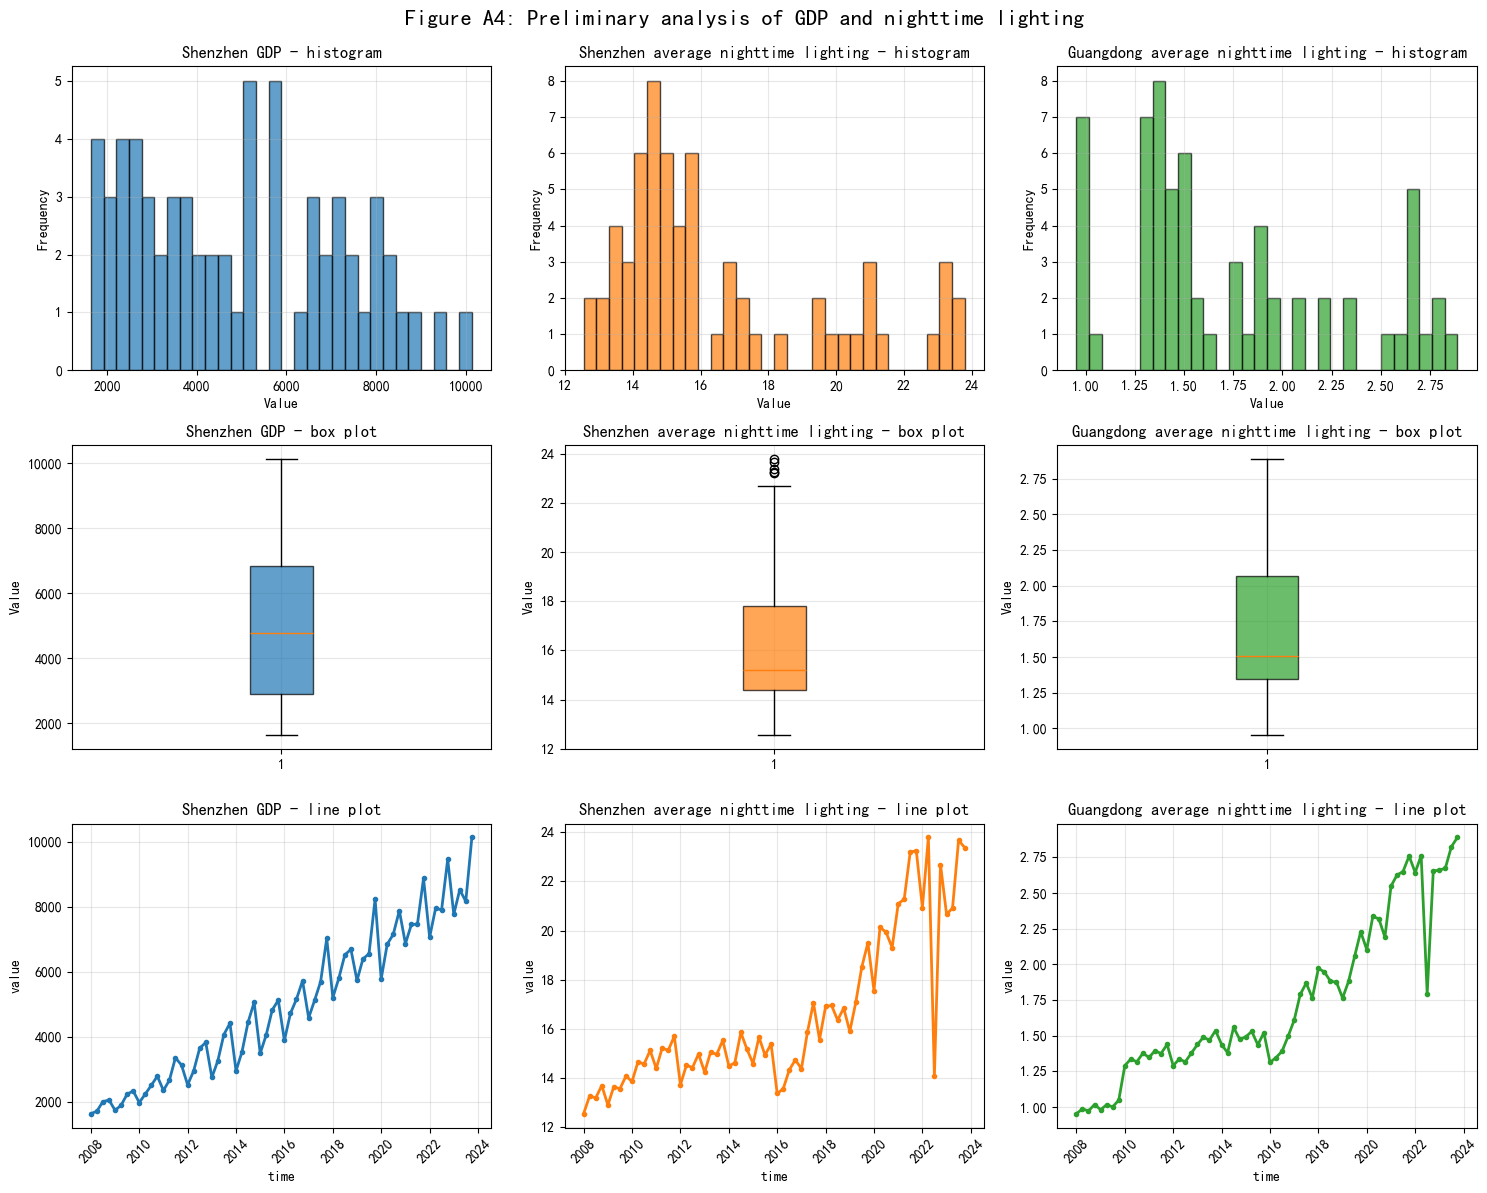

In [16]:
# ‰∏â‰∏™ÂèòÈáèÁöÑÁõ¥ÊñπÂõæ„ÄÅÁÆ±Á∫øÂõæÂíåÊäòÁ∫øÂõæ
def analyze_variables(df):
    """
    ÂØπGDP„ÄÅÂüéÂ∏ÇÁÅØÂÖâ„ÄÅÂú∞Âå∫ÁÅØÂÖâËøõË°åÁõ¥ÊñπÂõæ„ÄÅÁÆ±Á∫øÂõæÂíåÊäòÁ∫øÂõæÂàÜÊûê
    """
    variables = ['GDP', 'city_mean_light', 'region_mean_light']
    existing_vars = [var for var in variables if var in df.columns]
    
    # ÂèòÈáèÂêçÊò†Â∞ÑÂ≠óÂÖ∏
    var_name_mapping = {
        'GDP': 'Shenzhen GDP',
        'city_mean_light': 'Shenzhen average nighttime lighting',
        'region_mean_light': 'Guangdong average nighttime lighting'
    }
    
    if not existing_vars:
        print("Êú™ÊâæÂà∞ÊåáÂÆöÁöÑÂèòÈáèÂàó")
        return
    
    # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # ÂàõÂª∫ÂõæÂΩ¢ - 3Ë°åÔºàÁõ¥ÊñπÂõæ„ÄÅÁÆ±Á∫øÂõæ„ÄÅÊäòÁ∫øÂõæÔºâ
    fig, axes = plt.subplots(3, len(existing_vars), figsize=(5*len(existing_vars), 12))
    if len(existing_vars) == 1:
        axes = axes.reshape(-1, 1)
    
    # Ê∑ªÂä†‰∏ªÊ†áÈ¢ò
    fig.suptitle('Figure A4: Preliminary analysis of GDP and nighttime lighting', 
                 fontsize=16, fontweight='bold', y=0.99)
    
    for i, var in enumerate(existing_vars):
        data = df[var].dropna()
        display_name = var_name_mapping.get(var, var)
        
        # 1. Áõ¥ÊñπÂõæ
        axes[0, i].hist(data, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[0, i].set_title(f'{display_name} - histogram')
        axes[0, i].set_xlabel('Value')
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].grid(True, alpha=0.3)
        
        # 2. ÁÆ±Á∫øÂõæ
        box_plot = axes[1, i].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor(f'C{i}')
        box_plot['boxes'][0].set_alpha(0.7)
        axes[1, i].set_title(f'{display_name} - box plot')
        axes[1, i].set_ylabel('Value')
        axes[1, i].grid(True, alpha=0.3)
        
        # 3. ÊäòÁ∫øÂõæ
        axes[2, i].plot(df['time'], data, color=f'C{i}', linewidth=2, marker='o', markersize=3)
        axes[2, i].set_title(f'{display_name} - line plot')
        axes[2, i].set_xlabel('time')
        axes[2, i].set_ylabel('value')
        axes[2, i].tick_params(axis='x', rotation=45)
        axes[2, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ÊâßË°åÂàÜÊûê
if 'df' in locals():
    analyze_variables(df)
else:
    print("ËØ∑ÂÖàËøêË°åÊï∞ÊçÆËØªÂèñÂçïÂÖÉÊ†º")

In [ ]:
# ÂØπ‰∏â‰∏™ÂèòÈáèËøõË°åÂØπÊï∞ÂåñÂ§ÑÁêÜ
def create_log_variables(df):
    """
    ÂØπGDP„ÄÅÂüéÂ∏ÇÁÅØÂÖâ„ÄÅÂú∞Âå∫ÁÅØÂÖâËøõË°åÂØπÊï∞ÂåñÂ§ÑÁêÜ
    """
    variables = ['GDP', 'city_mean_light', 'region_mean_light']
    log_names = ['ln_gdp', 'ln_city', 'ln_region']
    
    print("ÂØπÊï∞ÂåñÂ§ÑÁêÜÁªìÊûúÔºö")
    print("="*50)
    
    for var, log_name in zip(variables, log_names):
        if var in df.columns:
            # Ê£ÄÊü•ÊòØÂê¶ÊúâÈùûÊ≠£ÂÄº
            data = df[var]
            min_val = data.min()
            
            if min_val <= 0:
                print(f"‚ö†Ô∏è {var} ÂåÖÂê´ÈùûÊ≠£ÂÄº (ÊúÄÂ∞èÂÄº: {min_val:.4f})")
                print(f"   Â∞ÜËøõË°åÂπ≥ÁßªÂ§ÑÁêÜ: Âä†‰∏ä {abs(min_val) + 1:.4f}")
                df[log_name] = np.log(data - min_val + 1)
            else:
                print(f"‚úÖ {var} ÊâÄÊúâÂÄº‰∏∫Ê≠£ÔºåÁõ¥Êé•ÂèñÂØπÊï∞")
                df[log_name] = np.log(data)
            
            # ÊòæÁ§∫Â§ÑÁêÜÁªìÊûú
            print(f"   {var} ‚Üí {log_name}")
            print(f"   ÂéüÂßãËåÉÂõ¥: {data.min():.4f} - {data.max():.4f}")
            print(f"   ÂØπÊï∞ÂêéËåÉÂõ¥: {df[log_name].min():.4f} - {df[log_name].max():.4f}")
            print()
        else:
            print(f"‚ùå Êú™ÊâæÂà∞ÂèòÈáè: {var}")
    
    # ÊòæÁ§∫Êñ∞ÁöÑÊï∞ÊçÆÊ°Ü‰ø°ÊÅØ
    print("Êõ¥Êñ∞ÂêéÁöÑÊï∞ÊçÆÊ°ÜÔºö")
    print(f"ÂàóÊï∞: {len(df.columns)}")
    print(f"Êñ∞Â¢ûÂàó: {[name for name in log_names if name in df.columns]}")
    print(f"\nÂâç5Ë°åÊñ∞Â¢ûÂàóÁöÑÊï∞ÊçÆ:")
    new_cols = [name for name in log_names if name in df.columns]
    if new_cols:
        print(df[new_cols].head())
    
    return df

# ÊâßË°åÂØπÊï∞ÂåñÂ§ÑÁêÜ
if 'df' in locals():
    df = create_log_variables(df)
    print("\n" + "="*50)
    print("Â§ÑÁêÜÂÆåÊàêÔºÅÂØπÊï∞ÂåñÂèòÈáèÂ∑≤Ê∑ªÂä†Âà∞Êï∞ÊçÆÊ°Ü‰∏≠")
else:
    print("ËØ∑ÂÖàËøêË°åÊï∞ÊçÆËØªÂèñÂçïÂÖÉÊ†º")

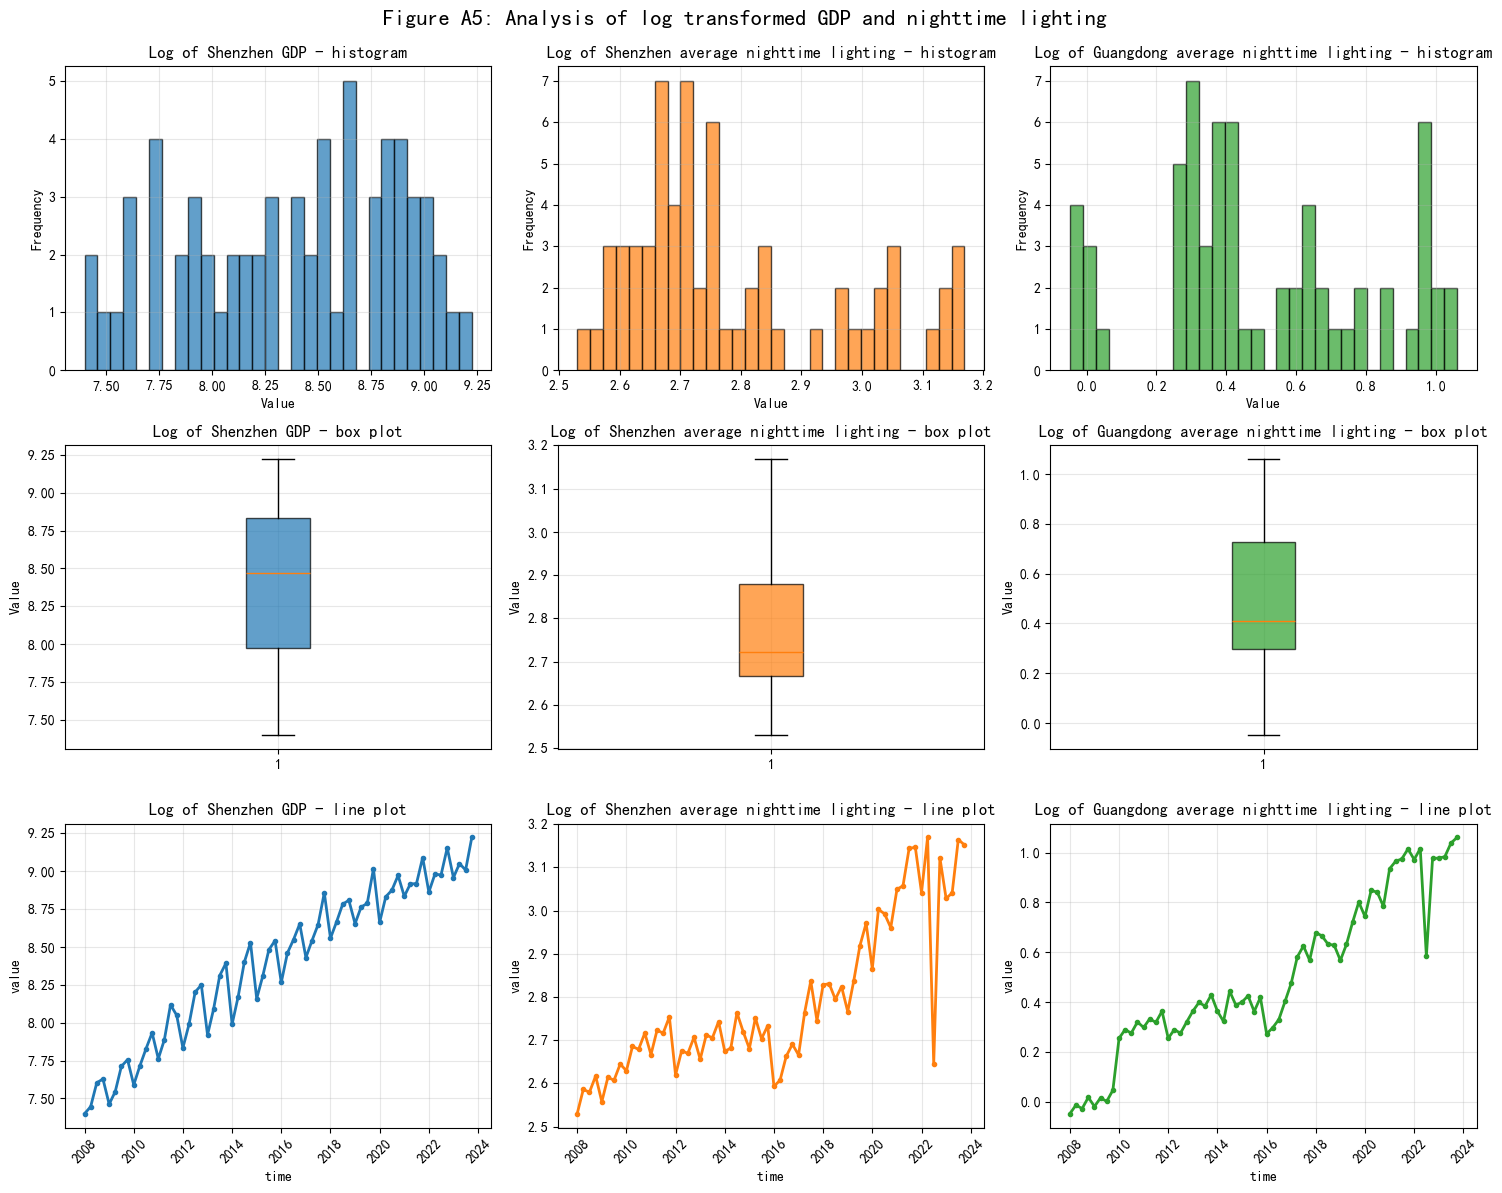

In [22]:
# ‰∏â‰∏™ÂèòÈáèÁöÑÁõ¥ÊñπÂõæ„ÄÅÁÆ±Á∫øÂõæÂíåÊäòÁ∫øÂõæ
def analyze_variables(df):
    """
    ÂØπGDP„ÄÅÂüéÂ∏ÇÁÅØÂÖâ„ÄÅÂú∞Âå∫ÁÅØÂÖâËøõË°åÁõ¥ÊñπÂõæ„ÄÅÁÆ±Á∫øÂõæÂíåÊäòÁ∫øÂõæÂàÜÊûê
    """
    variables = ['ln_gdp', 'ln_city', 'ln_region']
    existing_vars = [var for var in variables if var in df.columns]
    
    # ÂèòÈáèÂêçÊò†Â∞ÑÂ≠óÂÖ∏
    var_name_mapping = {
        'ln_gdp': 'Log of Shenzhen GDP',
        'ln_city': 'Log of Shenzhen average nighttime lighting',
        'ln_region': 'Log of Guangdong average nighttime lighting'
    }
    
    if not existing_vars:
        print("Êú™ÊâæÂà∞ÊåáÂÆöÁöÑÂèòÈáèÂàó")
        return
    
    # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # ÂàõÂª∫ÂõæÂΩ¢ - 3Ë°åÔºàÁõ¥ÊñπÂõæ„ÄÅÁÆ±Á∫øÂõæ„ÄÅÊäòÁ∫øÂõæÔºâ
    fig, axes = plt.subplots(3, len(existing_vars), figsize=(5*len(existing_vars), 12))
    if len(existing_vars) == 1:
        axes = axes.reshape(-1, 1)
    
    # Ê∑ªÂä†‰∏ªÊ†áÈ¢ò
    fig.suptitle('Figure A5: Analysis of log transformed GDP and nighttime lighting', 
                 fontsize=16, fontweight='bold', y=0.99)
    
    for i, var in enumerate(existing_vars):
        data = df[var].dropna()
        display_name = var_name_mapping.get(var, var)
        
        # 1. Áõ¥ÊñπÂõæ
        axes[0, i].hist(data, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[0, i].set_title(f'{display_name} - histogram')
        axes[0, i].set_xlabel('Value')
        axes[0, i].set_ylabel('Frequency')
        axes[0, i].grid(True, alpha=0.3)
        
        # 2. ÁÆ±Á∫øÂõæ
        box_plot = axes[1, i].boxplot(data, patch_artist=True)
        box_plot['boxes'][0].set_facecolor(f'C{i}')
        box_plot['boxes'][0].set_alpha(0.7)
        axes[1, i].set_title(f'{display_name} - box plot')
        axes[1, i].set_ylabel('Value')
        axes[1, i].grid(True, alpha=0.3)
        
        # 3. ÊäòÁ∫øÂõæ
        axes[2, i].plot(df['time'], data, color=f'C{i}', linewidth=2, marker='o', markersize=3)
        axes[2, i].set_title(f'{display_name} - line plot')
        axes[2, i].set_xlabel('time')
        axes[2, i].set_ylabel('value')
        axes[2, i].tick_params(axis='x', rotation=45)
        axes[2, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ÊâßË°åÂàÜÊûê
if 'df' in locals():
    analyze_variables(df)
else:
    print("ËØ∑ÂÖàËøêË°åÊï∞ÊçÆËØªÂèñÂçïÂÖÉÊ†º")

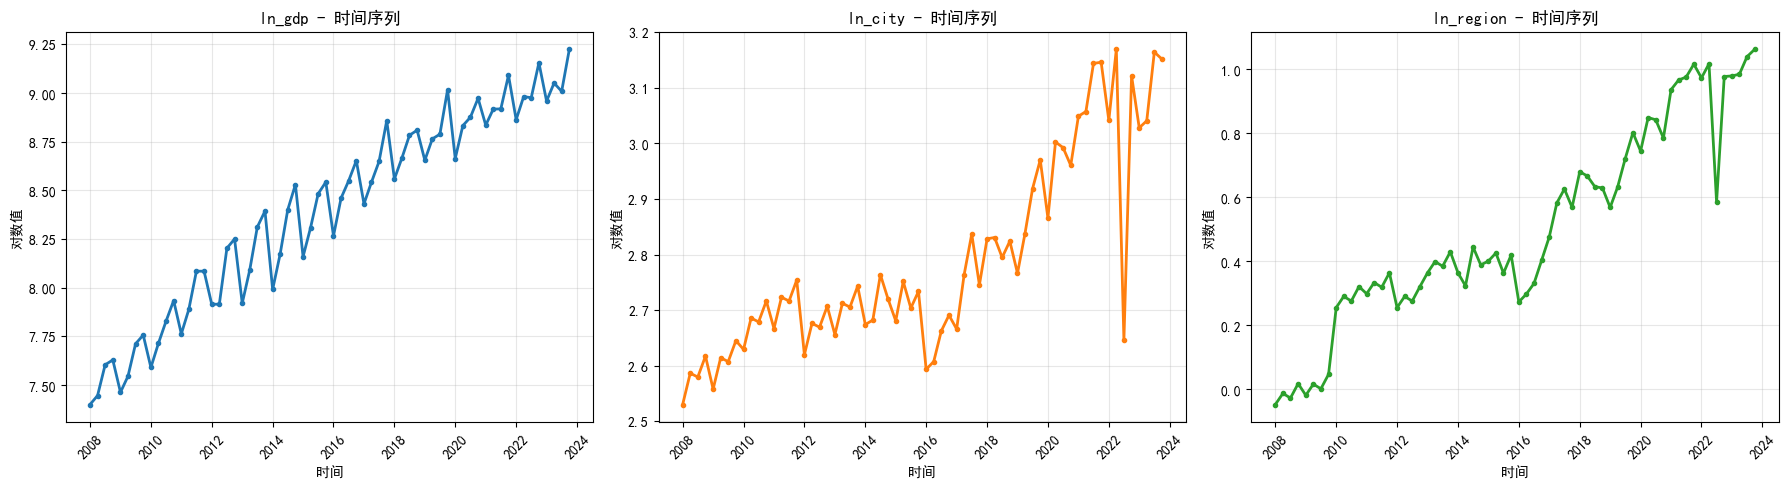

In [17]:
# ÂØπÊï∞ÂåñÂèòÈáèÁöÑÊäòÁ∫øÂõæÂíåÁªüËÆ°ÊèèËø∞
log_variables = ['ln_gdp', 'ln_city', 'ln_region']
existing_log_vars = [var for var in log_variables if var in df.columns]

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. ÁªòÂà∂ÊäòÁ∫øÂõæ
fig, axes = plt.subplots(1, len(existing_log_vars), figsize=(6*len(existing_log_vars), 5))
if len(existing_log_vars) == 1:
    axes = [axes]

for i, var in enumerate(existing_log_vars):
    data = df[var].dropna()

    # ÊäòÁ∫øÂõæ
    axes[i].plot(df['time'], data, color=f'C{i}', linewidth=2, marker='o', markersize=3)
    axes[i].set_title(f'{var} - Êó∂Èó¥Â∫èÂàó')
    axes[i].set_xlabel('Êó∂Èó¥')
    axes[i].set_ylabel('ÂØπÊï∞ÂÄº')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## seasonal test

In [25]:
# get quaeter dummy
df['quarter'] = df['time'].dt.quarter
quarter_dummies = pd.get_dummies(df['quarter'], prefix='Q', drop_first=True)

# add dummy into PC
df_with_dummies = df.join(quarter_dummies)

print("DataFrame with quarter dummies added:")
display(df_with_dummies.tail())

DataFrame with quarter dummies added:


time  GDP_4cum  city_mean_light  region_mean_light  \
59 2022-10-01  32387.68        22.685454           2.654705   
60 2023-01-01   7772.19        20.656377           2.659478   
61 2023-04-01  16297.60        20.919221           2.673637   
62 2023-07-01  24468.25        23.671801           2.823828   
63 2023-10-01  34606.40        23.374365           2.889727   

                title                                            website  \
59      2022Âπ¥Ê∑±Âú≥ÁªèÊµéËøêË°åÊÉÖÂÜµ  https://tjj.sz.gov.cn/zwgk/zfxxgkml/tjsj/tjfx/...   
60   2023Âπ¥‰∏ÄÂ≠£Â∫¶Ê∑±Âú≥ÁªèÊµéËøêË°åÊÉÖÂÜµ  https://tjj.sz.gov.cn/zwgk/zfxxgkml/tjsj/tjfx/...   
61   2023Âπ¥‰∏äÂçäÂπ¥Ê∑±Âú≥ÁªèÊµéËøêË°åÊÉÖÂÜµ  https://tjj.sz.gov.cn/zwgk/zfxxgkml/tjsj/tjfx/...   
62  2023Âπ¥Ââç‰∏âÂ≠£Â∫¶Ê∑±Âú≥ÁªèÊµéËøêË°åÊÉÖÂÜµ  https://tjj.sz.gov.cn/zwgk/zfxxgkml/tjsj/tjfx/...   
63      2023Âπ¥Ê∑±Âú≥ÁªèÊµéËøêË°åÊÉÖÂÜµ  https://tjj.sz.gov.cn/zwgk/zfxxgkml/tjsj/tjfx/...   

    Year  Month       GDP    ln_gdp   ln_city  ln_region  city_prop  \
59  2022     10   9462.59  9.155101  3.121724   0.976333   0.278325   
60  2023      1   7772.19  8.958307  3.028024   0.978130   0.233085   
61  2023      4   8525.41  9.050806  3.040668   0.983440   0.236051   
62  2023      7   8170.65  9.008304  3.164284   1.038093   0.267110   
63  2023     10  10138.15  9.224061  3.151640   1.061162   0.263754   

    region_prop  city_yearly_sum  region_yearly_sum  quarter    Q_2    Q_3  \
59     0.269376              NaN                NaN        4  False  False   
60     0.240749              NaN                NaN        1  False  False   
61     0.242031              NaN                NaN        2   True  False   
62     0.255627              NaN                NaN        3  False   True   
63     0.261593              NaN                NaN        4  False  False   

      Q_4  
59   True  
60  False  
61  False  
62  False  
63   True

In [26]:
import statsmodels.api as sm
import pandas as pd
import locale

# Set locale to English to ensure English output
try:
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
except:
    try:
        locale.setlocale(locale.LC_ALL, 'English_United States.1252')
    except:
        pass  # Keep default if setting fails

# Define dependent (PCs) and independent (quarter dummies) variables
dependent_variables = ['ln_gdp', 'ln_city', 'ln_region']
independent_variables = ['Q_2', 'Q_3', 'Q_4']

print("Seasonal Test Results:")

# Perform regression for each principal component
for pc_col in dependent_variables:
    print(f"\n--- Regression for {pc_col} ---")

    # Prepare data, dropping rows with NaNs in relevant columns
    # Explicitly convert boolean dummy variables to integers (0 or 1)
    temp_df = df_with_dummies[[pc_col] + independent_variables].copy().dropna()
    for col in independent_variables:
        if col in temp_df.columns:
            temp_df[col] = temp_df[col].astype(int)

    if temp_df.empty:
        print("No data available for regression after dropping NaNs.")
        continue

    # Add a constant and fit OLS model
    X = sm.add_constant(temp_df[independent_variables])
    y = temp_df[pc_col]

    try:
        model = sm.OLS(y, X).fit()
        
        # Print summary with English formatting
        summary_str = str(model.summary())
        # Replace any potential Chinese characters in the summary
        summary_str = summary_str.replace('Âë®Âõõ', 'Thu').replace('7Êúà', 'Jul')
        print(summary_str)

        # Perform and print F-test result
        # Ensure the variables for the F-test exist in the model
        f_test_vars = [var for var in independent_variables if var in model.params.index]
        if f_test_vars:
            f_test = model.f_test(f_test_vars)
            # Handle both scalar and array cases for p-value
            if hasattr(f_test.pvalue, '__len__') and len(f_test.pvalue.shape) > 0:
                p_value = f_test.pvalue[0][0] if f_test.pvalue.ndim > 1 else f_test.pvalue[0]
            else:
                p_value = float(f_test.pvalue)
            
            print(f"F-test ({', '.join(f_test_vars)} p-value): {p_value:.4f}")

            alpha = 0.05
            conclusion = "statistically significant seasonal effect." if p_value < alpha else "no statistically significant seasonal effect."
            print(f"Conclusion: {conclusion}")
        else:
            print("No dummy variables included in the model for F-test.")

    except Exception as e:
        print(f"Error during regression or F-test for {pc_col}: {e}")

print("\nSeasonal Test completed.")

Seasonal Test Results:

--- Regression for ln_gdp ---
                            OLS Regression Results                            
Dep. Variable:                 ln_gdp   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.400
Date:                Sat, 09 Aug 2025   Prob (F-statistic):              0.252
Time:                        03:37:03   Log-Likelihood:                -44.640
No. Observations:                  64   AIC:                             97.28
Df Residuals:                      60   BIC:                             105.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Seasonal Strength Analysis

=== Log of Shenzhen GDP Analysis ===
Seasonal Strength: 0.8339
Seasonal Component Std: 0.1020
Seasonal Component Range: 0.2712
Seasonality Assessment: Strong Seasonality

=== Log of Shenzhen average nighttime lighting Analysis ===
Seasonal Strength: 0.1302
Seasonal Component Std: 0.0229
Seasonal Component Range: 0.0602
Seasonality Assessment: Weak Seasonality

=== Log of Guangdong average nighttime lighting Analysis ===
Seasonal Strength: 0.0638
Seasonal Component Std: 0.0142
Seasonal Component Range: 0.0365
Seasonality Assessment: Weak Seasonality


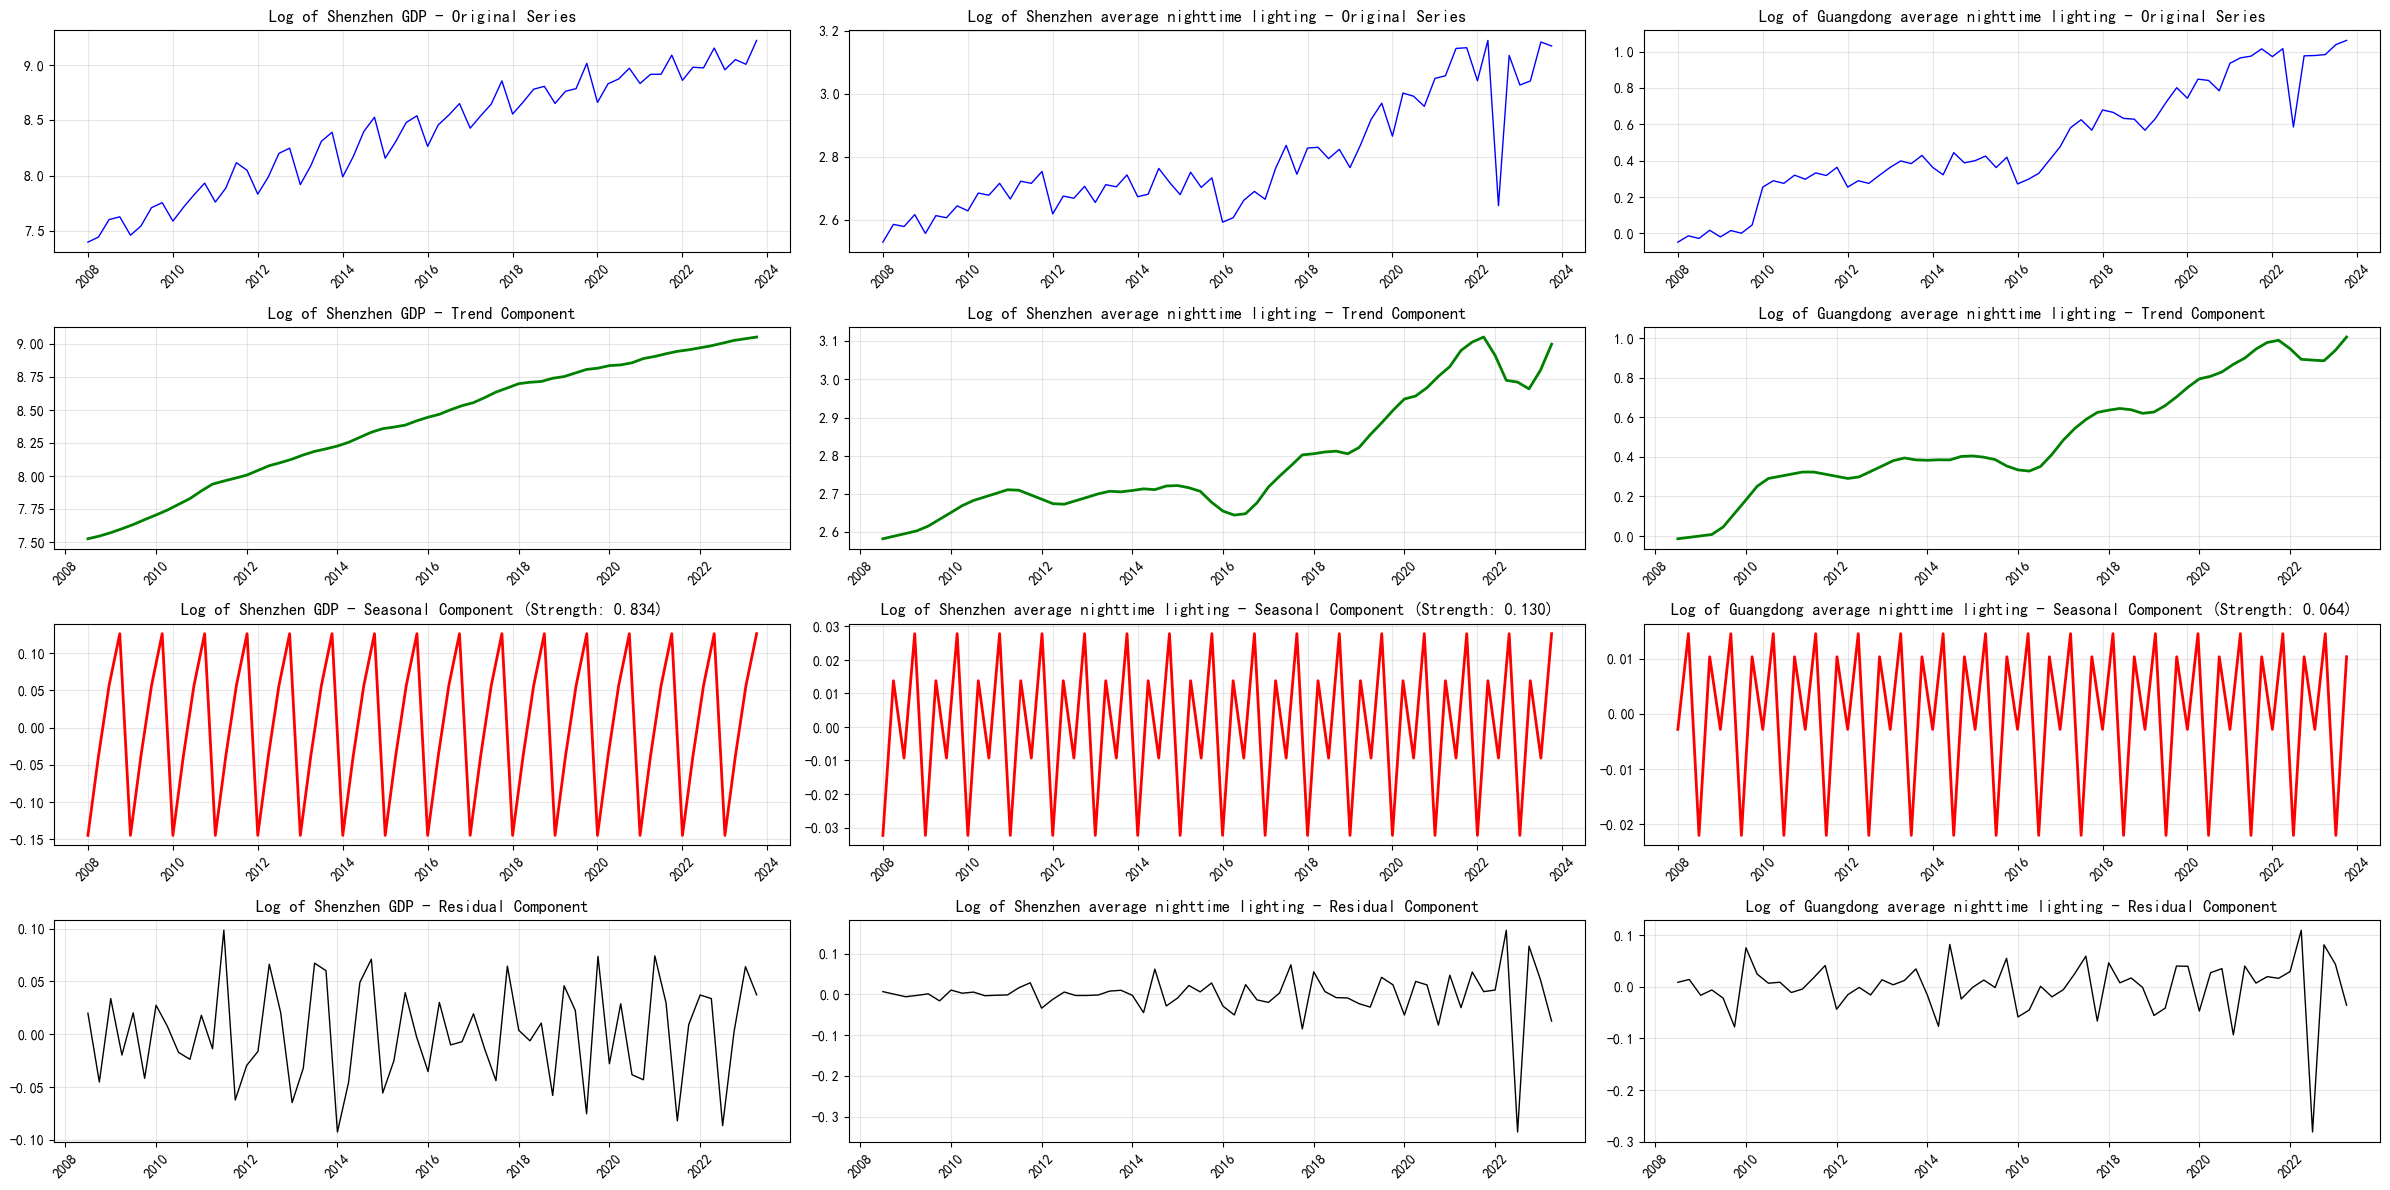


Seasonal Strength Comparison Summary
Log of Shenzhen GDP                 | Seasonal Strength: 0.8339 | Strong Seasonality
Log of Shenzhen average nighttime lighting | Seasonal Strength: 0.1302 | Weak Seasonality
Log of Guangdong average nighttime lighting | Seasonal Strength: 0.0638 | Weak Seasonality


In [34]:
# Seasonal strength analysis for log-transformed variables
log_variables = ['ln_gdp', 'ln_city', 'ln_region']
existing_log_vars = [var for var in log_variables if var in df.columns]

# Variable name mapping
var_name_mapping = {
    'ln_gdp': 'Log of Shenzhen GDP',
    'ln_city': 'Log of Shenzhen average nighttime lighting',
    'ln_region': 'Log of Guangdong average nighttime lighting'
}

# Set Chinese font
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Seasonal strength analysis function
def analyze_seasonal_strength(df, log_variables):
    """
    Analyze seasonal strength of log-transformed variables
    """
    print("="*60)
    print("Seasonal Strength Analysis")
    print("="*60)
    
    # Set time as index for seasonal decomposition
    df_temp = df.set_index('time').copy()
    
    seasonal_results = {}
    
    for var in log_variables:
        if var in df.columns:
            var_display = var_name_mapping.get(var, var)
            print(f"\n=== {var_display} Analysis ===")
            
            # Get data and remove missing values
            series = df_temp[var].dropna()
            
            # Check data length
            if len(series) < 8:  # Quarterly data needs at least 8 observations (2 years)
                print(f"‚ö†Ô∏è {var_display} insufficient data length, cannot perform seasonal decomposition")
                continue
            
            try:
                # Seasonal decomposition (quarterly data, period=4)
                decomposition = seasonal_decompose(series, model='additive', period=4)
                
                # Calculate seasonal strength indicators
                seasonal_component = decomposition.seasonal
                residual_component = decomposition.resid.dropna()
                
                # Seasonal strength = seasonal component variance / residual component variance
                seasonal_var = np.var(seasonal_component)
                residual_var = np.var(residual_component)
                seasonal_strength = seasonal_var / (seasonal_var + residual_var)
                
                # Other seasonal indicators
                seasonal_range = seasonal_component.max() - seasonal_component.min()
                seasonal_std = np.std(seasonal_component)
                
                print(f"Seasonal Strength: {seasonal_strength:.4f}")
                print(f"Seasonal Component Std: {seasonal_std:.4f}")
                print(f"Seasonal Component Range: {seasonal_range:.4f}")
                
                # Interpret seasonal strength
                if seasonal_strength > 0.6:
                    strength_desc = "Strong Seasonality"
                elif seasonal_strength > 0.3:
                    strength_desc = "Moderate Seasonality"
                else:
                    strength_desc = "Weak Seasonality"
                
                print(f"Seasonality Assessment: {strength_desc}")
                
                # Save results
                seasonal_results[var] = {
                    'seasonal_strength': seasonal_strength,
                    'seasonal_std': seasonal_std,
                    'seasonal_range': seasonal_range,
                    'description': strength_desc,
                    'decomposition': decomposition,
                    'display_name': var_display
                }
                
            except Exception as e:
                print(f"‚ùå {var_display} seasonal decomposition failed: {str(e)}")
    
    return seasonal_results

# Seasonal decomposition visualization function
def plot_seasonal_decomposition(seasonal_results):
    """
    Plot seasonal decomposition charts
    """
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    n_vars = len(seasonal_results)
    if n_vars == 0:
        print("No seasonal decomposition results to plot")
        return
    
    fig, axes = plt.subplots(4, n_vars, figsize=(8*n_vars, 12))
    if n_vars == 1:
        axes = axes.reshape(-1, 1)
    
    for i, (var, result) in enumerate(seasonal_results.items()):
        decomp = result['decomposition']
        var_display = result['display_name']
        
        # Original series
        axes[0, i].plot(decomp.observed.index, decomp.observed.values, 'b-', linewidth=1)
        axes[0, i].set_title(f'{var_display} - Original Series')
        axes[0, i].grid(True, alpha=0.3)
        
        # Trend component
        axes[1, i].plot(decomp.trend.index, decomp.trend.values, 'g-', linewidth=2)
        axes[1, i].set_title(f'{var_display} - Trend Component')
        axes[1, i].grid(True, alpha=0.3)
        
        # Seasonal component
        axes[2, i].plot(decomp.seasonal.index, decomp.seasonal.values, 'r-', linewidth=2)
        axes[2, i].set_title(f'{var_display} - Seasonal Component (Strength: {result["seasonal_strength"]:.3f})')
        axes[2, i].grid(True, alpha=0.3)
        
        # Residual component
        axes[3, i].plot(decomp.resid.index, decomp.resid.values, 'k-', linewidth=1)
        axes[3, i].set_title(f'{var_display} - Residual Component')
        axes[3, i].grid(True, alpha=0.3)
        
        # Rotate x-axis labels
        for j in range(4):
            axes[j, i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Execute seasonal strength analysis
log_variables = ['ln_gdp', 'ln_city', 'ln_region']
existing_log_vars = [var for var in log_variables if var in df.columns]

if existing_log_vars:
    # Analyze seasonal strength
    seasonal_results = analyze_seasonal_strength(df, existing_log_vars)
    
    # Plot seasonal decomposition
    if seasonal_results:
        plot_seasonal_decomposition(seasonal_results)
        
        # Summary comparison
        print("\n" + "="*60)
        print("Seasonal Strength Comparison Summary")
        print("="*60)
        for var, result in seasonal_results.items():
            var_display = result['display_name']
            print(f"{var_display:35} | Seasonal Strength: {result['seasonal_strength']:.4f} | {result['description']}")
    else:
        print("All seasonal decomposition failed")
else:
    print("Log-transformed variables not found, please run log transformation first")

### seasonal adjust

In [4]:
df.head

<bound method NDFrame.head of          time  GDP_4cum  city_mean_light  region_mean_light  \
0  2008-01-01   1634.65        12.553247           0.953015   
1  2008-04-01   3346.63        13.280818           0.986813   
2  2008-07-01   5351.74        13.191190           0.972665   
3  2008-10-01   7407.66        13.697327           1.017466   
4  2009-01-01   1740.90        12.906907           0.980980   
..        ...       ...              ...                ...   
59 2022-10-01  32387.68        22.685454           2.654705   
60 2023-01-01   7772.19        20.656377           2.659478   
61 2023-04-01  16297.60        20.919221           2.673637   
62 2023-07-01  24468.25        23.671801           2.823828   
63 2023-10-01  34606.40        23.374365           2.889727   

                title                                            website  \
0                (Â°´Ë°•)                                               none   
1                (Â°´Ë°•)                                

In [5]:

from statsmodels.tsa.seasonal import STL
import pandas as pd

print("=== Seasonal Adjustment (STL-based) ===")

if 'ln_gdp' in df.columns:
    # ÂáÜÂ§áÊó∂Èó¥Â∫èÂàóÊï∞ÊçÆ
    df_temp = df.set_index('time')
    ln_gdp_series = df_temp['ln_gdp'].dropna()
    
    # ‰ΩøÁî®STLËøõË°åÂ≠£ËäÇÂàÜËß£ÔºàÊ®°ÊãüX-12ÊïàÊûúÔºâ
    stl = STL(ln_gdp_series, period=4, robust=True).fit()
    
    # Â≠£ËäÇË∞ÉÊï¥Â∫èÂàó = ÂéüÂ∫èÂàó - Â≠£ËäÇÊàêÂàÜ
    ln_gdp_sa = stl.observed - stl.seasonal
    seasonal_factors = stl.seasonal
    
    # Êò†Â∞ÑÂõûÂéüDataFrame
    df['ln_gdp_sa'] = df['time'].map(ln_gdp_sa.to_dict())
    df['ln_gdp_seasonal_factor'] = df['time'].map(seasonal_factors.to_dict())
    
    print(f"‚úÖ ÂÆåÊàêÔºÅÊñ∞Â¢ûÂàó: ln_gdp_sa, ln_gdp_seasonal_factor")
    print(f"Â≠£ËäÇÂõ†Â≠êËåÉÂõ¥: {seasonal_factors.min():.4f} to {seasonal_factors.max():.4f}")
else:
    print("‚ùå Êú™ÊâæÂà∞ln_gdpÂàó")

=== Seasonal Adjustment (STL-based) ===
‚úÖ ÂÆåÊàêÔºÅÊñ∞Â¢ûÂàó: ln_gdp_sa, ln_gdp_seasonal_factor
Â≠£ËäÇÂõ†Â≠êËåÉÂõ¥: -0.1797 to 0.1463


In [6]:
# ‰øùÂ≠òSTLÂéªÂ≠£ËäÇÂô®ÔºàÁÆÄÊ¥ÅÁâàÔºâ
import pickle

# ‰øùÂ≠òSTLÊ®°ÂûãÂíåÂ≠£ËäÇÂõ†Â≠ê
stl_deseasonalizer = {
    'seasonal_factors': stl.seasonal,  # Â≠£ËäÇÂõ†Â≠êÂ∫èÂàó
    'quarterly_averages': stl.seasonal.groupby(stl.seasonal.index.quarter).mean(),  # ÂêÑÂ≠£Â∫¶Âπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê
    'model_params': {'period': 4, 'robust': True}  # Ê®°ÂûãÂèÇÊï∞
}

# ‰øùÂ≠òÂà∞Êñá‰ª∂
with open(r"C:\Users\huawei\OneDrive\Ê°åÈù¢\stl_deseasonalizer.pkl", 'wb') as f:
    pickle.dump(stl_deseasonalizer, f)

print("‚úÖ STLÂéªÂ≠£ËäÇÂô®Â∑≤‰øùÂ≠òÔºÅ")
print(f"üìä ÂêÑÂ≠£Â∫¶Âπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê: {stl_deseasonalizer['quarterly_averages'].to_dict()}")


‚úÖ STLÂéªÂ≠£ËäÇÂô®Â∑≤‰øùÂ≠òÔºÅ
üìä ÂêÑÂ≠£Â∫¶Âπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê: {1: -0.11735833627936566, 2: -0.04065096198361591, 3: 0.048853816355181455, 4: 0.1094974786833777}


1. Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ïÔºàÊé®ËçêÔºâ-- Â≠£Â∫¶Âπ≥ÂùáÂÄº
2. ÊúÄÂêé‰∏Ä‰∏™Âë®ÊúüÈáçÂ§çÊ≥ïÔºàÁÆÄÂçïÔºâ

ÊØèÊ¨°Ëø≠‰ª£‰ΩøÁî®50‰∏™Â≠£Â∫¶‰Ωú‰∏∫ËÆ≠ÁªÉÊï∞ÊçÆÔºåÊé•‰∏ãÊù•5‰∏™Â≠£Â∫¶‰Ωú‰∏∫ÊµãËØïÊï∞ÊçÆ
Á™óÂè£‰∏çÊñ≠ÂêëÂâçÊªëÂä®ÔºåÊ®°ÊãüÁúüÂÆûÁöÑÈ¢ÑÊµãÂú∫ÊôØ

ËÆ°ÁÆóËÆ≠ÁªÉÊúüÂÜÖÊØè‰∏™Â≠£Â∫¶ÁöÑÂπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê
È¢ÑÊµãÂÄº = Ë∂ãÂäøÂùáÂÄº + ÂØπÂ∫îÂ≠£Â∫¶ÁöÑÂπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê

ËÆ°ÁÆóËÆ≠ÁªÉÊúüÂÜÖÊØè‰∏™Â≠£Â∫¶ÁöÑÂπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê
È¢ÑÊµãÂÄº = Ë∂ãÂäøÂùáÂÄº + ÂØπÂ∫îÂ≠£Â∫¶ÁöÑÂπ≥ÂùáÂ≠£ËäÇÂõ†Â≠ê

In [7]:
# Â≠£ËäÇÂõ†Â≠êÈ¢ÑÊµãÊñπÊ≥ïÊØîËæÉ (Áõ¥Êé•ÊØîËæÉÂ≠£ËäÇÂõ†Â≠ê)
import numpy as np
from sklearn.metrics import mean_squared_error

# Á°Æ‰øùdfÊúâquarterÂàó
if 'quarter' not in df.columns:
    df['quarter'] = df['time'].dt.quarter

mse_results = {'extrap': [], 'repeat': []}

# ÊªöÂä®Á™óÂè£È™åËØÅ
for i in range(len(df) - 45):
    # ËÆ≠ÁªÉÊúüÔºö40‰∏™Â≠£Â∫¶ÔºåÊµãËØïÊúüÔºö5‰∏™Â≠£Â∫¶
    train_data = df.iloc[i:i+40].copy()
    test_data = df.iloc[i+40:i+45].copy()
    
    # ÊñπÊ≥ï1: Â≠£Â∫¶Âπ≥ÂùáÂÄºÂ§ñÊé®Ê≥ï
    # ËÆ°ÁÆóËÆ≠ÁªÉÊúüÂêÑÂ≠£Â∫¶Â≠£ËäÇÂõ†Â≠êÁöÑÂπ≥ÂùáÂÄº
    quarterly_avg = train_data.groupby('quarter')['ln_gdp_seasonal_factor'].mean()
    pred_seasonal_1 = [quarterly_avg.get(q, 0) for q in test_data['quarter']]
    
    # ÊñπÊ≥ï2: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï
    # ‰ΩøÁî®ËÆ≠ÁªÉÊúüÊúÄÂêé4‰∏™Â≠£Â∫¶ÁöÑÂ≠£ËäÇÂõ†Â≠ê
    last_4_quarters = train_data.iloc[-4:].set_index('quarter')['ln_gdp_seasonal_factor']
    pred_seasonal_2 = [last_4_quarters.get(q, 0) for q in test_data['quarter']]
    
    # ËÆ°ÁÆó‰∏éÁúüÂÆûÂ≠£ËäÇÂõ†Â≠êÁöÑMSE
    true_seasonal = test_data['ln_gdp_seasonal_factor'].values
    mse_results['extrap'].append(mean_squared_error(true_seasonal, pred_seasonal_1))
    mse_results['repeat'].append(mean_squared_error(true_seasonal, pred_seasonal_2))

# ÁªìÊûú
avg_mse1, avg_mse2 = np.mean(mse_results['extrap']), np.mean(mse_results['repeat'])
print(f"Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï MSE: {avg_mse1:.6f}")
print(f"ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: {avg_mse2:.6f}")
print(f"ÊúÄ‰ºòÊñπÊ≥ï: {'Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï' if avg_mse1 < avg_mse2 else 'ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï'}")

Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï MSE: 0.002634
ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: 0.000203
ÊúÄ‰ºòÊñπÊ≥ï: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï


In [8]:

# ÊªöÂä®Á™óÂè£È™åËØÅ
mse_results = {'extrap': [], 'repeat': []}
for i in range(len(df) - 50):
    train_df = df.iloc[i:i+45].set_index('time')
    test_df = df.iloc[i+45:i+50]
    
    # ÊñπÊ≥ï1: Â≠£Â∫¶Âπ≥ÂùáÂÄºÂ§ñÊé®Ê≥ï
    # ËÆ°ÁÆóËÆ≠ÁªÉÊúüÂêÑÂ≠£Â∫¶Â≠£ËäÇÂõ†Â≠êÁöÑÂπ≥ÂùáÂÄº
    quarterly_avg = train_data.groupby('quarter')['ln_gdp_seasonal_factor'].mean()
    pred_seasonal_1 = [quarterly_avg.get(q, 0) for q in test_data['quarter']]
    
    # ÊñπÊ≥ï2: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï
    # ‰ΩøÁî®ËÆ≠ÁªÉÊúüÊúÄÂêé4‰∏™Â≠£Â∫¶ÁöÑÂ≠£ËäÇÂõ†Â≠ê
    last_4_quarters = train_data.iloc[-4:].set_index('quarter')['ln_gdp_seasonal_factor']
    pred_seasonal_2 = [last_4_quarters.get(q, 0) for q in test_data['quarter']]
    
    # ËÆ°ÁÆó‰∏éÁúüÂÆûÂ≠£ËäÇÂõ†Â≠êÁöÑMSE
    true_seasonal = test_data['ln_gdp_seasonal_factor'].values
    mse_results['extrap'].append(mean_squared_error(true_seasonal, pred_seasonal_1))
    mse_results['repeat'].append(mean_squared_error(true_seasonal, pred_seasonal_2))

# ÁªìÊûú
avg_mse1, avg_mse2 = np.mean(mse_results['extrap']), np.mean(mse_results['repeat'])
print(f"Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï MSE: {avg_mse1:.6f}")
print(f"ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: {avg_mse2:.6f}")
print(f"ÊúÄ‰ºòÊñπÊ≥ï: {'Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï' if avg_mse1 < avg_mse2 else 'ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï'}")


Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï MSE: 0.004499
ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: 0.000348
ÊúÄ‰ºòÊñπÊ≥ï: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï

ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: 0.000348
ÊúÄ‰ºòÊñπÊ≥ï: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï


In [9]:


mse_results = {'extrap': [], 'repeat': []}
for i in range(len(df) - 55):
    train_df = df.iloc[i:i+50].set_index('time')
    test_df = df.iloc[i+50:i+55]
    
    # ÊñπÊ≥ï1: Â≠£Â∫¶Âπ≥ÂùáÂÄºÂ§ñÊé®Ê≥ï
    # ËÆ°ÁÆóËÆ≠ÁªÉÊúüÂêÑÂ≠£Â∫¶Â≠£ËäÇÂõ†Â≠êÁöÑÂπ≥ÂùáÂÄº
    quarterly_avg = train_df.groupby('quarter')['ln_gdp_seasonal_factor'].mean()
    pred_seasonal_1 = [quarterly_avg.get(q, 0) for q in test_df['quarter']]
    
    # ÊñπÊ≥ï2: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï
    # ‰ΩøÁî®ËÆ≠ÁªÉÊúüÊúÄÂêé4‰∏™Â≠£Â∫¶ÁöÑÂ≠£ËäÇÂõ†Â≠ê
    last_4_quarters = train_df.iloc[-4:].set_index('quarter')['ln_gdp_seasonal_factor']
    pred_seasonal_2 = [last_4_quarters.get(q, 0) for q in test_df['quarter']]
    
    # ËÆ°ÁÆó‰∏éÁúüÂÆûÂ≠£ËäÇÂõ†Â≠êÁöÑMSE
    true_seasonal = test_df['ln_gdp_seasonal_factor'].values
    mse_results['extrap'].append(mean_squared_error(true_seasonal, pred_seasonal_1))
    mse_results['repeat'].append(mean_squared_error(true_seasonal, pred_seasonal_2))

# ÁªìÊûú
avg_mse1, avg_mse2 = np.mean(mse_results['extrap']), np.mean(mse_results['repeat'])
print(f"Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï MSE: {avg_mse1:.6f}")
print(f"ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: {avg_mse2:.6f}")
print(f"ÊúÄ‰ºòÊñπÊ≥ï: {'Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï' if avg_mse1 < avg_mse2 else 'ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï'}")

Â≠£ËäÇÊ®°ÂºèÂ§ñÊé®Ê≥ï MSE: 0.003280
ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: 0.000200
ÊúÄ‰ºòÊñπÊ≥ï: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï

ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï MSE: 0.000200
ÊúÄ‰ºòÊñπÊ≥ï: ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ï


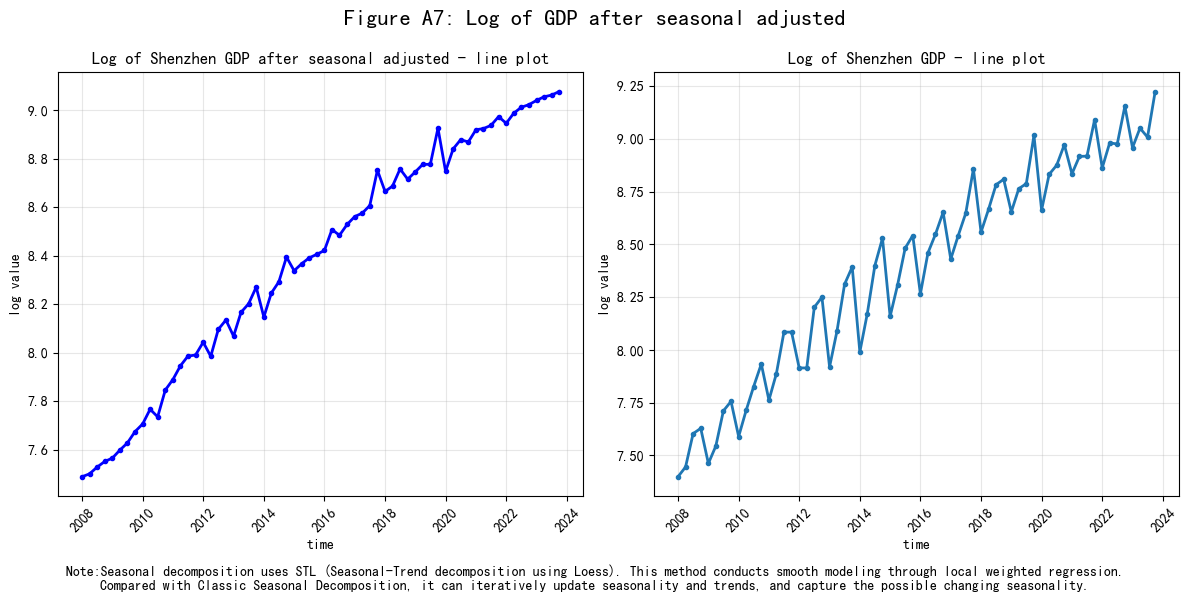

In [10]:
# ÂØπÊï∞ÂåñÂèòÈáèÁöÑÊäòÁ∫øÂõæÂíåÁªüËÆ°ÊèèËø∞
log_variables = ['ln_gdp_sa', 'ln_gdp']
existing_log_vars = [var for var in log_variables if var in df.columns]

# ÂèòÈáèÂêçÊò†Â∞ÑÂ≠óÂÖ∏
var_name_mapping = {
    'ln_gdp_sa': 'Log of Shenzhen GDP after seasonal adjusted',
    'ln_gdp': 'Log of Shenzhen GDP'
}

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 1. ÁªòÂà∂ÊäòÁ∫øÂõæ
fig, axes = plt.subplots(1, len(existing_log_vars), figsize=(6*len(existing_log_vars), 6))
if len(existing_log_vars) == 1:
    axes = [axes]

# Ê∑ªÂä†‰∏ªÊ†áÈ¢ò
fig.suptitle('Figure A7: Log of GDP after seasonal adjusted', 
             fontsize=16, fontweight='bold', y=0.99)

for i, var in enumerate(existing_log_vars):
    data = df[var].dropna()
    display_name = var_name_mapping.get(var, var)

    # ËÆæÁΩÆÈ¢úËâ≤Ôºöln_gdp_saÁî®Á∫ØËìùËâ≤Ôºåln_gdpÁî®ÁÅ∞ËìùËâ≤
    if var == 'ln_gdp_sa':
        color = 'blue'
    elif var == 'ln_gdp':
        color = 'C0'  # ÈªòËÆ§ÁöÑÁÅ∞ËìùËâ≤
    else:
        color = f'C{i}'

    # ÊäòÁ∫øÂõæ
    axes[i].plot(df['time'], data, color=color, linewidth=2, marker='o', markersize=3)
    axes[i].set_title(f'{display_name} - line plot')
    axes[i].set_xlabel('time')
    axes[i].set_ylabel('log value')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()

# Ê∑ªÂä†Ê≥®Èáä
fig.text(0.5, 0.02, 
         'Note:Seasonal decomposition uses STL (Seasonal-Trend decomposition using Loess). This method conducts smooth modeling through local weighted regression.\nCompared with Classic Seasonal Decomposition, it can iteratively update seasonality and trends, and capture the possible changing seasonality.',
         ha='center', va='bottom', fontsize=10, style='italic', wrap=True)

plt.subplots_adjust(bottom=0.18)  # ‰∏∫Ê≥®ÈáäÁïôÂá∫Á©∫Èó¥
plt.show()

## ADF test

In [63]:

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Ensure PC DataFrame is available
if 'df' in locals() and isinstance(df, pd.DataFrame):
    variables_to_test = ['ln_gdp_sa', 'ln_city', 'ln_region']

    print("--- Full ADF Test Results ---")

    for var in variables_to_test:
        if var in df.columns:
            print(f"\nADF Test for '{var}':")

            # Get the time series data, dropping NaNs if any (ADF test requires no NaNs)
            series = df[var].dropna()

            if len(series) > 0:
                try:
                    # Perform the ADF test
                    # 'ct' includes a constant and a trend
                    # 'c' includes only a constant (often suitable for differenced series)
                    # 'nc' includes neither
                    # Choosing 'c' as a common assumption, adjust if needed
                    # Use 'ct' for 'pc2' to include a trend term
                    regression_type = 'ct' 
                    print(f"  Regression type: '{regression_type}'")
                    adf_test_result = adfuller(series, regression=regression_type)


                    # Extract and print the full results
                    print(f"  ADF Statistic: {adf_test_result[0]:.4f}")
                    print(f"  P-value: {adf_test_result[1]:.4f}")
                    print(f"  Number of Lags Used: {adf_test_result[2]}")
                    print(f"  Number of Observations Used: {adf_test_result[3]}")
                    print("  Critical Values:")
                    for key, value in adf_test_result[4].items():
                        print(f"    {key}: {value:.4f}")

                    # Optional: Print a conclusion based on the p-value
                    alpha = 0.05
                    conclusion = "stationary" if adf_test_result[1] < alpha else "non-stationary"
                    print(f"  Conclusion (at alpha={alpha}): {conclusion}")

                except Exception as e:
                    print(f"  Error during ADF test for '{var}': {e}")
            else:
                print(f"  '{var}' has no data after dropping NaNs.")

    print("\nADF Test task finished.")

else:
    print("DataFrame 'PC' not found or is not a DataFrame. Please ensure 'PC' is loaded.")

--- Full ADF Test Results ---

ADF Test for 'ln_gdp_sa':
  Regression type: 'ct'
  ADF Statistic: -0.4559
  P-value: 0.9851
  Number of Lags Used: 4
  Number of Observations Used: 59
  Critical Values:
    1%: -4.1210
    5%: -3.4877
    10%: -3.1721
  Conclusion (at alpha=0.05): non-stationary

ADF Test for 'ln_city':
  Regression type: 'ct'
  ADF Statistic: -2.5897
  P-value: 0.2846
  Number of Lags Used: 1
  Number of Observations Used: 62
  Critical Values:
    1%: -4.1127
    5%: -3.4838
    10%: -3.1699
  Conclusion (at alpha=0.05): non-stationary

ADF Test for 'ln_region':
  Regression type: 'ct'
  ADF Statistic: -2.8252
  P-value: 0.1878
  Number of Lags Used: 1
  Number of Observations Used: 62
  Critical Values:
    1%: -4.1127
    5%: -3.4838
    10%: -3.1699
  Conclusion (at alpha=0.05): non-stationary

ADF Test task finished.


In [65]:
# ÂØπÂØπÊï∞ÂåñÂèòÈáèËøõË°å‰∏ÄÈò∂Â∑ÆÂàÜ
def create_diff_variables(df):
    """
    ÂØπln_gdp„ÄÅln_city„ÄÅln_regionËøõË°å‰∏ÄÈò∂Â∑ÆÂàÜ
    """
    print("‰∏ÄÈò∂Â∑ÆÂàÜÂ§ÑÁêÜÔºö")
    print("="*50)
    
    # ÂÆö‰πâË¶ÅÂ∑ÆÂàÜÁöÑÂèòÈáè
    log_vars = ['ln_gdp_sa', 'ln_city', 'ln_region']
    diff_names = ['dln_gdp_sa', 'dln_city', 'dln_region']
    
    for log_var, diff_name in zip(log_vars, diff_names):
        if log_var in df.columns:
            # ËÆ°ÁÆó‰∏ÄÈò∂Â∑ÆÂàÜ
            df[diff_name] = df[log_var].diff()
            
            # ÁªüËÆ°‰ø°ÊÅØ
            original_count = df[log_var].dropna().shape[0]
            diff_count = df[diff_name].dropna().shape[0]
            
            print(f"‚úÖ {log_var} ‚Üí {diff_name}")
            print(f"   ÂéüÂßãÊï∞ÊçÆ: {original_count} ‰∏™ËßÇÊµã")
            print(f"   Â∑ÆÂàÜÂêé: {diff_count} ‰∏™ËßÇÊµã (‰∏¢Â§±{original_count-diff_count}‰∏™)")
            print(f"   Â∑ÆÂàÜÂÄºËåÉÂõ¥: {df[diff_name].min():.4f} - {df[diff_name].max():.4f}")
            print()
        else:
            print(f"‚ùå Êú™ÊâæÂà∞ÂèòÈáè: {log_var}")
    
    # ÊòæÁ§∫Â∑ÆÂàÜÂêéÁöÑÂâçÂá†Ë°åÊï∞ÊçÆ
    print("Â∑ÆÂàÜÂêéÁöÑÂâç5Ë°åÊï∞ÊçÆ:")
    diff_cols = [name for name in diff_names if name in df.columns]
    if diff_cols:
        print(df[['time'] + diff_cols].head())
    
    return df

# ÊâßË°åÂ∑ÆÂàÜÂ§ÑÁêÜ
if 'df' in locals() and 'ln_gdp' in df.columns:
    df = create_diff_variables(df)
    print("\n" + "="*50)
    print("Â∑ÆÂàÜÂ§ÑÁêÜÂÆåÊàêÔºÅ")
else:
    print("ËØ∑ÂÖàËøêË°åÂØπÊï∞ÂåñÂ§ÑÁêÜ")

‰∏ÄÈò∂Â∑ÆÂàÜÂ§ÑÁêÜÔºö
‚úÖ ln_gdp_sa ‚Üí dln_gdp_sa
   ÂéüÂßãÊï∞ÊçÆ: 64 ‰∏™ËßÇÊµã
   Â∑ÆÂàÜÂêé: 63 ‰∏™ËßÇÊµã (‰∏¢Â§±1‰∏™)
   Â∑ÆÂàÜÂÄºËåÉÂõ¥: -0.1816 - 0.1482

‚úÖ ln_city ‚Üí dln_city
   ÂéüÂßãÊï∞ÊçÆ: 64 ‰∏™ËßÇÊµã
   Â∑ÆÂàÜÂêé: 63 ‰∏™ËßÇÊµã (‰∏¢Â§±1‰∏™)
   Â∑ÆÂàÜÂÄºËåÉÂõ¥: -0.5235 - 0.4759

‚úÖ ln_region ‚Üí dln_region
   ÂéüÂßãÊï∞ÊçÆ: 64 ‰∏™ËßÇÊµã
   Â∑ÆÂàÜÂêé: 63 ‰∏™ËßÇÊµã (‰∏¢Â§±1‰∏™)
   Â∑ÆÂàÜÂÄºËåÉÂõ¥: -0.4312 - 0.3915

Â∑ÆÂàÜÂêéÁöÑÂâç5Ë°åÊï∞ÊçÆ:
        time  dln_gdp_sa  dln_city  dln_region
0 2008-01-01         NaN       NaN         NaN
1 2008-04-01    0.021537  0.056341    0.034850
2 2008-07-01    0.030430 -0.006772   -0.014441
3 2008-10-01    0.025043  0.037652    0.045031
4 2009-01-01    0.011370 -0.059438   -0.036519

Â∑ÆÂàÜÂ§ÑÁêÜÂÆåÊàêÔºÅ


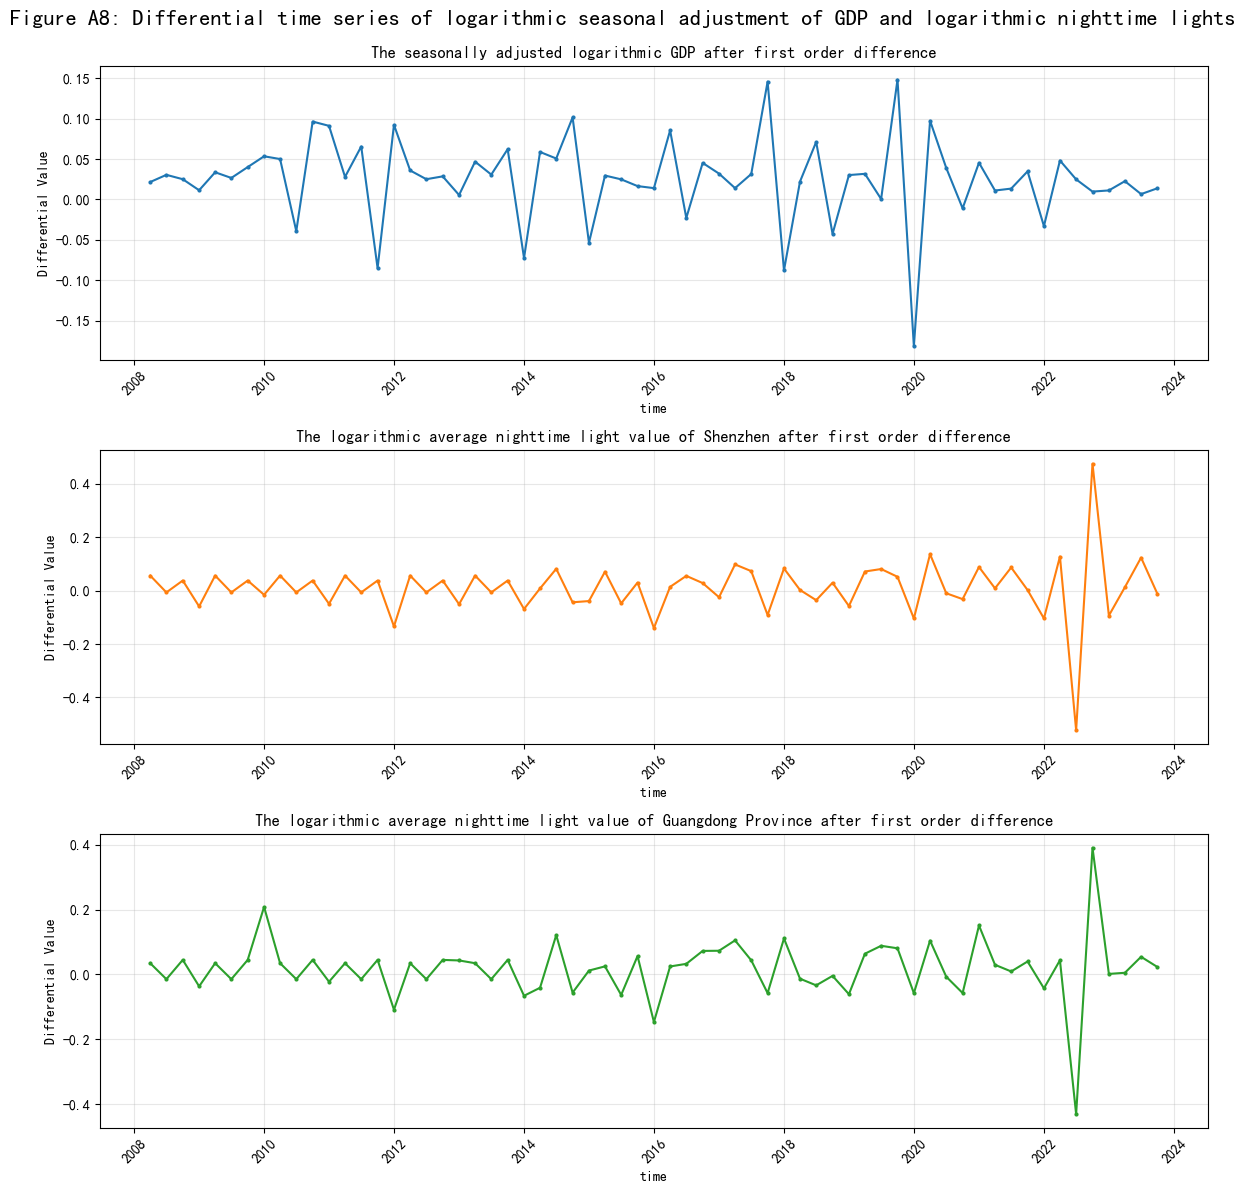

In [78]:
# Â∑ÆÂàÜÂèòÈáèÁöÑÂèØËßÜÂåñÂàÜÊûê
def plot_diff_variables(df):
    """
    ÁªòÂà∂Â∑ÆÂàÜÂèòÈáèÁöÑÊó∂Èó¥Â∫èÂàóÂõæ
    """
    diff_variables = ['dln_gdp_sa', 'dln_city', 'dln_region']
    existing_diff_vars = [var for var in diff_variables if var in df.columns]
    
    # ÂèòÈáèÂêçÊò†Â∞ÑÂ≠óÂÖ∏
    var_name_mapping = {
        'dln_gdp_sa': 'The seasonally adjusted logarithmic GDP after first order difference',
        'dln_city': 'The logarithmic average nighttime light value of Shenzhen after first order difference',
        'dln_region': 'The logarithmic average nighttime light value of Guangdong Province after first order difference'
    }
    
    if not existing_diff_vars:
        print("Êú™ÊâæÂà∞Â∑ÆÂàÜÂèòÈáè")
        return
    
    # ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    
    # ÂàõÂª∫Â≠êÂõæ
    fig, axes = plt.subplots(len(existing_diff_vars), 1, figsize=(12, 4*len(existing_diff_vars)))
    if len(existing_diff_vars) == 1:
        axes = [axes]
    
    # Ê∑ªÂä†‰∏ªÊ†áÈ¢ò
    fig.suptitle('Figure A8: Differential time series of logarithmic seasonal adjustment of GDP and logarithmic nighttime lights', 
                 fontsize=16, fontweight='bold', y=0.99)
    
    for i, var in enumerate(existing_diff_vars):
        data = df[var].dropna()
        time_data = df.loc[data.index, 'time'] if 'time' in df.columns else data.index
        display_name = var_name_mapping.get(var, var)
        
        # ÁªòÂà∂Â∑ÆÂàÜÂ∫èÂàó
        axes[i].plot(time_data, data, color=f'C{i}', linewidth=1.5, marker='o', markersize=2)
        axes[i].set_title(f'{display_name}', fontsize=12)
        axes[i].set_xlabel('time')
        axes[i].set_ylabel('Differential Value')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# ÁªòÂà∂Â∑ÆÂàÜÂèòÈáèÂõæ
diff_variables = ['dln_gdp_sa', 'dln_city', 'dln_region']
existing_diff_vars = [var for var in diff_variables if var in df.columns]

if existing_diff_vars:
    plot_diff_variables(df)
else:
    print("ËØ∑ÂÖàËøêË°åÂ∑ÆÂàÜÂ§ÑÁêÜ‰ª£Á†Å")

In [68]:

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Ensure PC DataFrame is available
if 'df' in locals() and isinstance(df, pd.DataFrame):
    variables_to_test = ['dln_gdp_sa', 'dln_city', 'dln_region']

    print("--- Full ADF Test Results ---")

    for var in variables_to_test:
        if var in df.columns:
            print(f"\nADF Test for '{var}':")

            # Get the time series data, dropping NaNs if any (ADF test requires no NaNs)
            series = df[var].dropna()

            if len(series) > 0:
                try:
                    # Perform the ADF test
                    # 'ct' includes a constant and a trend
                    # 'c' includes only a constant (often suitable for differenced series)
                    # 'nc' includes neither
                    regression_type = 'c' 
                    print(f"  Regression type: '{regression_type}'")
                    adf_test_result = adfuller(series, regression=regression_type)


                    # Extract and print the full results
                    print(f"  ADF Statistic: {adf_test_result[0]:.4f}")
                    print(f"  P-value: {adf_test_result[1]:.4f}")
                    print(f"  Number of Lags Used: {adf_test_result[2]}")
                    print(f"  Number of Observations Used: {adf_test_result[3]}")
                    print("  Critical Values:")
                    for key, value in adf_test_result[4].items():
                        print(f"    {key}: {value:.4f}")

                    # Optional: Print a conclusion based on the p-value
                    alpha = 0.05
                    conclusion = "stationary" if adf_test_result[1] < alpha else "non-stationary"
                    print(f"  Conclusion (at alpha={alpha}): {conclusion}")

                except Exception as e:
                    print(f"  Error during ADF test for '{var}': {e}")
            else:
                print(f"  '{var}' has no data after dropping NaNs.")

    print("\nADF Test task finished.")

else:
    print("DataFrame 'PC' not found or is not a DataFrame. Please ensure 'PC' is loaded.")

--- Full ADF Test Results ---

ADF Test for 'dln_gdp_sa':
  Regression type: 'c'
  ADF Statistic: -9.3194
  P-value: 0.0000
  Number of Lags Used: 1
  Number of Observations Used: 61
  Critical Values:
    1%: -3.5424
    5%: -2.9102
    10%: -2.5927
  Conclusion (at alpha=0.05): stationary

ADF Test for 'dln_city':
  Regression type: 'c'
  ADF Statistic: -8.8961
  P-value: 0.0000
  Number of Lags Used: 1
  Number of Observations Used: 61
  Critical Values:
    1%: -3.5424
    5%: -2.9102
    10%: -2.5927
  Conclusion (at alpha=0.05): stationary

ADF Test for 'dln_region':
  Regression type: 'c'
  ADF Statistic: -11.9550
  P-value: 0.0000
  Number of Lags Used: 0
  Number of Observations Used: 62
  Critical Values:
    1%: -3.5405
    5%: -2.9094
    10%: -2.5923
  Conclusion (at alpha=0.05): stationary

ADF Test task finished.


In [ ]:
# Â∞ÜÊï∞ÊçÆ‰øùÂ≠ò‰∏∫CSVÊñá‰ª∂
output_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\adjusted.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')

### merge data

In [14]:
file_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\adjusted.csv"

# ËØªÂèñÊï∞ÊçÆÔºåtimeÂàóËß£Êûê‰∏∫Êó•Êúü‰ΩÜ‰∏çËÆæ‰∏∫Á¥¢Âºï
ad = pd.read_csv(file_path, parse_dates=['time'])

# ÊåâÊó∂Èó¥Âàó‰ªéÂ∞èÂà∞Â§ßÊéíÂ∫è
ad = ad.sort_values('time').reset_index(drop=True)

print(ad.dtypes)
print(ad.shape)


file_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\original.xlsx"
ori = pd.read_excel(file_path, parse_dates=['time'])
ori = ori.sort_values('time').reset_index(drop=True)

print(ori.dtypes)
print(ori.shape)

time                      datetime64[ns]
GDP_4cum                         float64
city_mean_light                  float64
region_mean_light                float64
title                             object
website                           object
Year                               int64
Month                              int64
GDP                              float64
ln_gdp                           float64
ln_city                          float64
ln_region                        float64
city_prop                        float64
region_prop                      float64
city_yearly_sum                  float64
region_yearly_sum                float64
quarter                            int64
ln_gdp_sa                        float64
ln_gdp_seasonal_factor           float64
dln_gdp_sa                       float64
dln_city                         float64
dln_region                       float64
dtype: object
(64, 22)
time                 datetime64[ns]
GDP_4cum                    float64
cit

In [19]:
# ÊåâtimeÂàóÂêàÂπ∂Êï∞ÊçÆÈõÜadÂíåoriÔºàÂÆåÂÖ®ÂêàÂπ∂ÁâàÔºâ
ad_cols = ad[['time', 'ln_gdp_sa', 'ln_gdp_seasonal_factor', 'dln_gdp_sa', 'city_mean_light', 'region_mean_light', 'ln_city', 'ln_region']]
ori_cols = ori[['time', 'GDP', 'ln_gdp']]

data = pd.merge(ad_cols, ori_cols, on='time', how='outer')

print(f"ÂêàÂπ∂ÂêéÊï∞ÊçÆÂΩ¢Áä∂: {data.shape}")
print(f"Êó∂Èó¥ËåÉÂõ¥: {data['time'].min()} Âà∞ {data['time'].max()}")
data

ÂêàÂπ∂ÂêéÊï∞ÊçÆÂΩ¢Áä∂: (69, 10)
Êó∂Èó¥ËåÉÂõ¥: 2008-01-01 00:00:00 Âà∞ 2025-01-01 00:00:00


time  ln_gdp_sa  ln_gdp_seasonal_factor  dln_gdp_sa  city_mean_light  \
0  2008-01-01   7.477351               -0.078167         NaN        12.553247   
1  2008-04-01   7.498888               -0.053482    0.021537        13.280818   
2  2008-07-01   7.529319                0.074136    0.030430        13.191190   
3  2008-10-01   7.554362                0.074117    0.025043        13.697327   
4  2009-01-01   7.565732               -0.103575    0.011370        12.906907   
..        ...        ...                     ...         ...              ...   
64 2024-01-01        NaN                     NaN         NaN              NaN   
65 2024-04-01        NaN                     NaN         NaN              NaN   
66 2024-07-01        NaN                     NaN         NaN              NaN   
67 2024-10-01        NaN                     NaN         NaN              NaN   
68 2025-01-01        NaN                     NaN         NaN              NaN   

    region_mean_light   ln_city  ln_region       GDP    ln_gdp  
0            0.953015  2.529979  -0.048125   1634.65  7.399184  
1            0.986813  2.586321  -0.013275   1711.98  7.445406  
2            0.972665  2.579549  -0.027716   2005.11  7.603454  
3            1.017466  2.617201   0.017316   2055.92  7.628479  
4            0.980980  2.557763  -0.019203   1740.90  7.462157  
..                ...       ...        ...       ...       ...  
64                NaN       NaN        NaN   8314.98  9.025814  
65                NaN       NaN        NaN   8987.24  9.103561  
66                NaN       NaN        NaN   8632.06  9.063238  
67                NaN       NaN        NaN  10867.59  9.293540  
68                NaN       NaN        NaN   8950.49  9.099464  

[69 rows x 10 columns]

In [20]:
file_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\PC_final.csv"
PC = pd.read_csv(file_path, parse_dates=['time'])
PC = PC.sort_values('time').reset_index(drop=True)

print(PC.dtypes)
print(PC.shape)

time    datetime64[ns]
pc1            float64
pc2            float64
pc3            float64
dpc2           float64
dtype: object
(64, 5)


In [21]:
# Â∞ÜPCÊï∞ÊçÆÈõÜÁöÑÊâÄÊúâÂàóÂêàÂπ∂Âà∞data‰∏≠ÔºàÂÆåÂÖ®ÂêàÂπ∂ÁâàÔºâ
data = pd.merge(data, PC, on='time', how='outer')

print(data.tail(6))

         time  ln_gdp_sa  ln_gdp_seasonal_factor  dln_gdp_sa  city_mean_light  \
63 2023-10-01   9.078985                0.145076    0.013833        23.374365   
64 2024-01-01        NaN                     NaN         NaN              NaN   
65 2024-04-01        NaN                     NaN         NaN              NaN   
66 2024-07-01        NaN                     NaN         NaN              NaN   
67 2024-10-01        NaN                     NaN         NaN              NaN   
68 2025-01-01        NaN                     NaN         NaN              NaN   

    region_mean_light  ln_city  ln_region       GDP    ln_gdp       pc1  \
63           2.889727  3.15164   1.061162  10138.15  9.224061 -0.126969   
64                NaN      NaN        NaN   8314.98  9.025814 -0.340136   
65                NaN      NaN        NaN   8987.24  9.103561  0.463105   
66                NaN      NaN        NaN   8632.06  9.063238 -0.217543   
67                NaN      NaN        NaN  10867.59  9.29

In [22]:
# ‰∏∫final_dataÊ∑ªÂä†quarterÂàóÔºàÁÆÄÊ¥ÅÁâàÔºâ
data['quarter'] = data['time'].dt.month.map({1: 1, 4: 2, 7: 3, 10: 4})

data

time  ln_gdp_sa  ln_gdp_seasonal_factor  dln_gdp_sa  city_mean_light  \
0  2008-01-01   7.477351               -0.078167         NaN        12.553247   
1  2008-04-01   7.498888               -0.053482    0.021537        13.280818   
2  2008-07-01   7.529319                0.074136    0.030430        13.191190   
3  2008-10-01   7.554362                0.074117    0.025043        13.697327   
4  2009-01-01   7.565732               -0.103575    0.011370        12.906907   
..        ...        ...                     ...         ...              ...   
64 2024-01-01        NaN                     NaN         NaN              NaN   
65 2024-04-01        NaN                     NaN         NaN              NaN   
66 2024-07-01        NaN                     NaN         NaN              NaN   
67 2024-10-01        NaN                     NaN         NaN              NaN   
68 2025-01-01        NaN                     NaN         NaN              NaN   

    region_mean_light   ln_city  ln_region       GDP    ln_gdp       pc1  \
0            0.953015  2.529979  -0.048125   1634.65  7.399184 -0.930701   
1            0.986813  2.586321  -0.013275   1711.98  7.445406 -0.810655   
2            0.972665  2.579549  -0.027716   2005.11  7.603454  0.061691   
3            1.017466  2.617201   0.017316   2055.92  7.628479  0.236543   
4            0.980980  2.557763  -0.019203   1740.90  7.462157  0.327092   
..                ...       ...        ...       ...       ...       ...   
64                NaN       NaN        NaN   8314.98  9.025814 -0.340136   
65                NaN       NaN        NaN   8987.24  9.103561  0.463105   
66                NaN       NaN        NaN   8632.06  9.063238 -0.217543   
67                NaN       NaN        NaN  10867.59  9.293540 -0.420393   
68                NaN       NaN        NaN   8950.49  9.099464 -0.000561   

         pc2       pc3      dpc2  quarter  
0   0.185353  0.281816       NaN        1  
1   0.314787  0.089018  0.129435        2  
2   0.290403  0.006259 -0.024384        3  
3   0.422133 -0.012724  0.131730        4  
4   0.505859 -0.071886  0.083726        1  
..       ...       ...       ...      ...  
64 -0.068752 -0.013587 -0.042775        1  
65 -0.189923  0.065931 -0.121171        2  
66 -0.215419  0.043802 -0.025495        3  
67 -0.176598  0.008674  0.038820        4  
68 -0.158594 -0.012403  0.018004        1  

[69 rows x 15 columns]

In [27]:
# ÂØπln_cityÂíåln_regionËøõË°åÂØπÊï∞ÂåñÂ§ÑÁêÜ
data['ln_city'] = np.log(data['city_mean_light'])
data['ln_region'] = np.log(data['region_mean_light'])

# ÂØπln_cityÂíåln_regionËøõË°å‰∏ÄÈò∂Â∑ÆÂàÜ
data['dln_city'] = data['ln_city'].diff()
data['dln_region'] = data['ln_region'].diff()

In [28]:
# ÊúÄÂêéÂë®ÊúüÈáçÂ§çÊ≥ïÔºöÁî®2023Âπ¥Â≠£ËäÇÂõ†Â≠êÂ°´ÂÖ•2024Âπ¥Âíå2025Âπ¥Á¨¨‰∏ÄÂ≠£Â∫¶
# ÊèêÂèñ2023Âπ¥ÂêÑÂ≠£Â∫¶ÁöÑÂ≠£ËäÇÂõ†Â≠ê
seasonal_2023 = data[data['time'].dt.year == 2023][['quarter', 'ln_gdp_seasonal_factor']].dropna()
seasonal_dict = dict(zip(seasonal_2023['quarter'], seasonal_2023['ln_gdp_seasonal_factor']))

# Â°´ÂÖ•2024Âπ¥Âíå2025Âπ¥Á¨¨‰∏ÄÂ≠£Â∫¶
for year in [2024, 2025]:
    mask = data['time'].dt.year == year
    data.loc[mask, 'ln_gdp_seasonal_factor'] = data.loc[mask, 'quarter'].map(seasonal_dict)

data

time  ln_gdp_sa  ln_gdp_seasonal_factor  dln_gdp_sa  city_mean_light  \
0  2008-01-01   7.477351               -0.078167         NaN        12.553247   
1  2008-04-01   7.498888               -0.053482    0.021537        13.280818   
2  2008-07-01   7.529319                0.074136    0.030430        13.191190   
3  2008-10-01   7.554362                0.074117    0.025043        13.697327   
4  2009-01-01   7.565732               -0.103575    0.011370        12.906907   
..        ...        ...                     ...         ...              ...   
64 2024-01-01        NaN               -0.077646         NaN              NaN   
65 2024-04-01        NaN               -0.007745         NaN              NaN   
66 2024-07-01        NaN               -0.056848         NaN              NaN   
67 2024-10-01        NaN                0.145076         NaN              NaN   
68 2025-01-01        NaN               -0.077646         NaN              NaN   

    region_mean_light   ln_city  ln_region       GDP    ln_gdp       pc1  \
0            0.953015  2.529979  -0.048125   1634.65  7.399184 -0.930701   
1            0.986813  2.586321  -0.013275   1711.98  7.445406 -0.810655   
2            0.972665  2.579549  -0.027716   2005.11  7.603454  0.061691   
3            1.017466  2.617201   0.017316   2055.92  7.628479  0.236543   
4            0.980980  2.557763  -0.019203   1740.90  7.462157  0.327092   
..                ...       ...        ...       ...       ...       ...   
64                NaN       NaN        NaN   8314.98  9.025814 -0.340136   
65                NaN       NaN        NaN   8987.24  9.103561  0.463105   
66                NaN       NaN        NaN   8632.06  9.063238 -0.217543   
67                NaN       NaN        NaN  10867.59  9.293540 -0.420393   
68                NaN       NaN        NaN   8950.49  9.099464 -0.000561   

         pc2       pc3      dpc2  quarter  dln_city  dln_region  
0   0.185353  0.281816       NaN        1       NaN         NaN  
1   0.314787  0.089018  0.129435        2  0.056341    0.034850  
2   0.290403  0.006259 -0.024384        3 -0.006772   -0.014441  
3   0.422133 -0.012724  0.131730        4  0.037652    0.045031  
4   0.505859 -0.071886  0.083726        1 -0.059438   -0.036519  
..       ...       ...       ...      ...       ...         ...  
64 -0.068752 -0.013587 -0.042775        1       NaN         NaN  
65 -0.189923  0.065931 -0.121171        2       NaN         NaN  
66 -0.215419  0.043802 -0.025495        3       NaN         NaN  
67 -0.176598  0.008674  0.038820        4       NaN         NaN  
68 -0.158594 -0.012403  0.018004        1       NaN         NaN  

[69 rows x 17 columns]

In [25]:
# Â∞ÜÊï∞ÊçÆ‰øùÂ≠ò‰∏∫CSVÊñá‰ª∂
output_path = r"C:\Users\huawei\OneDrive\Ê°åÈù¢\df.csv"
data.to_csv(output_path, index=False, encoding='utf-8-sig')

ÁªèËøáÊâãÂä®Ë∞ÉÊï¥dfÔºåÂç≥Âà†Èô§‰∏çÂøÖË¶ÅÁöÑË°åÔºåÂ¶ÇË°å2012-2013Q1ÔºåÂíåÊâãÂä®ËÆ°ÁÆóÂ∑ÆÂàÜÂíåÂ°´Ë°•cityÂíåregionÂàóÔºåÂ∞ÜdfÂèò‰∏∫Êï∞ÊçÆÈõÜdata

## Ê®°ÂûãÈõÜÊàêÁ≠ñÁï•

### ÁúüÂÆûÈ¢ÑÊµãÊ®°ÂûãÈÄâÊã©ÊñπÊ°à

ÈíàÂØπ**Êú™ËßÅËøáÁöÑÊñ∞Êï∞ÊçÆ**ÁöÑÁúüÂÆûÈ¢ÑÊµãÔºåÊé®Ëçê‰ΩøÁî®**Á≤æÈÄâÊúÄ‰ºòÊ®°Âûã**ËÄåÈùûÂÖ®ÈÉ®Ê®°ÂûãÔºö

#### Êé®ËçêÈÖçÁΩÆÔºö5‰∏™ÊúÄ‰ºòÊ®°Âûã
- **ARIMAX**: 7‰∏™ÂâçÂêëÈÄâÊã©Ê®°Âûã‰∏≠MSEÊúÄ‰ΩéÁöÑ1‰∏™
- **ÈöèÊú∫Ê£ÆÊûó**: ‰∏çÂêåÂèÇÊï∞ËÆæÁΩÆ‰∏≠MSEÊúÄ‰ΩéÁöÑ1‰∏™  
- **XGBoost**: ‰∏çÂêåÂèÇÊï∞ËÆæÁΩÆ‰∏≠MSEÊúÄ‰ΩéÁöÑ1‰∏™
- **GRU**: 3ÁßçÁªìÊûÑ‰∏≠MSEÊúÄ‰ΩéÁöÑ1‰∏™Ôºà‰∏çÊòØÂêÑÂèñ1‰∏™Ôºâ
- **CNN**: 3ÁßçÁªìÊûÑ‰∏≠MSEÊúÄ‰ΩéÁöÑ1‰∏™Ôºà‰∏çÊòØÂêÑÂèñ1‰∏™Ôºâ

**ÊÄªËÆ°Ôºö5‰∏™Ê®°ÂûãËøõË°åÈõÜÊàêÈ¢ÑÊµã**

#### ‰∏∫‰ªÄ‰πà‰∏çÁî®ÂÖ®ÈÉ®49‰∏™Ê®°ÂûãÔºü
1. **Ê≥õÂåñËÉΩÂäõ**ÔºöÊ®°ÂûãË∂äÂ§öË∂äÂÆπÊòìËøáÊãüÂêàÈ™åËØÅÈõÜ
2. **ËÆ°ÁÆóÊïàÁéá**ÔºöÂÆûÈôÖÈ¢ÑÊµãÊó∂ÈÄüÂ∫¶Êõ¥Âø´
3. **Á®≥ÂÆöÊÄß**ÔºöÂáèÂ∞ëÊ®°ÂûãÈó¥ÁöÑÂô™Èü≥Âπ≤Êâ∞
4. **ÂÆûÁî®ÊÄß**ÔºöÊõ¥ÂÆπÊòìÁª¥Êä§ÂíåËß£Èáä

#### ‰∏∫‰ªÄ‰πàÁ•ûÁªèÁΩëÁªúÂè™ÈÄâ1‰∏™ÊúÄ‰ºòÔºü
- ÂêåÁ±ªÂûãÁªìÊûÑÁöÑÁ•ûÁªèÁΩëÁªúÂ≠¶Âà∞ÁöÑÁâπÂæÅÁõ∏‰ºº
- ÊúÄ‰ºòÁöÑÈÇ£‰∏™Â∑≤Áªè‰ª£Ë°®‰∫ÜËØ•ÁΩëÁªúÁ±ªÂûãÁöÑÊúÄ‰Ω≥ÊÄßËÉΩ
- Â§ö‰∏™Áõ∏‰ººÊ®°Âûã‰ºöÂ¢ûÂä†ÂÜó‰ΩôËÄåÈùûÂ§öÊ†∑ÊÄß

#### ÈõÜÊàêÊùÉÈáçÂª∫ËÆÆ
- **Á≠âÊùÉÈáç**ÔºöÊØè‰∏™Ê®°ÂûãÊùÉÈáç0.2
- **ÊÄßËÉΩÂä†ÊùÉ**ÔºöÊ†πÊçÆÈ™åËØÅÈõÜË°®Áé∞ÂàÜÈÖçÊùÉÈáç
- **Ëá™ÈÄÇÂ∫îÊùÉÈáç**ÔºöÊ†πÊçÆÈ¢ÑÊµãÁΩÆ‰ø°Â∫¶Âä®ÊÄÅË∞ÉÊï¥